In [2]:
using LinearAlgebra
using Plots

In [68]:
#= Physic constant define :
    - ħ stands for reduced Planck constant
    - k stands for force constant
    - m stands for mass of the particle
=#

ħ = 1
k = 1
m = 10
ω = sqrt(k/m)

#= Consts define :
    - n   number of division
    - x⁻  left boundary of position
    - x⁺  right boundary of position
    - Δx  step size of position  
=#
n = 500
x⁺ = 4
x⁻ = -4
Δx = (x⁺-x⁻)/n

#===================================================
Mathematic model pre-defines for harmonic oscillator
===================================================#

#= Potential energy ∨(x)
    - x : position input, support vector input 
    
    Return the potential energy based on harmonic oscillator
    
    Example:
    for input x it gives return ∨(x)
    for vector x⃗ it gives return [∨(x₁),∨(x₂),...,∨(xₙ)]
=#
function ∨(x)
    return 1/2*k*x.^2
end

#===========================================
 Pre-defines for solveing numercial solution
============================================#

#= Position vector x⃗
    Physical definiton:
    - x⃗ = [x₁,x₂,...,xₙ] 
=#
x⃗ = Float64[x⁻+i*Δx for i in 0:n-1]

#= Momentum operator square p̂²
    for a 5*5 momentum operator square matrix
            [-2 1 . . .]
            [1 -2 1 . .]
    - p̂² =  [. 1 -2 1 .]   *  -ħ^2/(Δx^2)
            [. . 1 -2 1]
            [. . . 1 -2]
=#
p̂² = -diagm(0=>-2*ones(n),1=>ones(n-1),-1=>ones(n-1))/2(Δx^2)

for i in 1:n
    p̂²[i, :] = p̂²[i, :] / m
end

#= Potential operator ∨̂
    for a 5*5 momentum operator square matrix
            [∨(x₁). . . . ]
            [. ∨(x₂). . . ]
    - ∨̂ =   [. . ∨(x₃). . ]
            [. . . ∨(x₄). ]
            [. . . . ∨(x₅)]
    
=#
∨̂ = diagm(0=>∨(x⃗))

#= Hamiltonian  operator Ĥ
    Hamiltonian operator will be the sum of kinetic energy & potential energy
    - Ĥ = p̂²/2m + ∨̂
=#
Ĥ = p̂² + ∨̂


# Find Eigenvalues and eigenvectors for Ĥ
E,ψ = eigen(Ĥ)

# normalize each eigenvector
# for i in 1:n
#     ψ[:,i] = ψ[:,i]/sqrt(norm(ψ[:,i].^2))
# end

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
500-element Vector{Float64}:
   0.158105882603611
   0.4743016453814777
   0.7904654008699232
   1.1065971442071592
   1.4226968705283118
   1.7387645749664145
   2.0548002526520364
   2.370803898715057
   2.6867755083022455
   3.0027150767195905
   ⋮
 782.9812255966066
 783.7042015387382
 783.7488844346326
 784.6101717040603
 784.6590580530707
 785.713555470264
 785.7667822745825
 787.1616013075901
 787.219710994245
vectors:
500×500 Matrix{Float64}:
 4.38959e-13   4.33221e-12  2.99127e-11  …   0.0         0.0172531
 8.95542e-13   8.83134e-12  6.09296e-11      0.0        -0.0343268
 1.38779e-12   1.36679e-11  9.41757e-11      0.0         0.0510549
 1.93485e-12   1.90221e-11  1.30837e-10      0.0        -0.0672856
 2.55771e-12   2.50907e-11  1.72199e-10      0.0         0.0828826
 3.27993e-12   3.20935e-11  2.19694e-10  …   0.0        -0.0977258
 4.12852e-12   4.02809e-11  2.74942e-10      0.0         0.111712
 5.13486e-1

In [69]:
#==================================
Analytical solution for harmonic oscillator
===================================#
#= Hermite polynomial Hₙ(n,x)
    - n : order of Hermite polynomial
    - x : position input, support vector input 
    
    Return nth Hermite polynomial (defined to order 5)
=#
function Hermite(n,x)
    if n == 0
        return 1
    elseif n == 1
        return x
    elseif n == 2
        return 4*x.^2 .-2

    end
end

#= Analytic solution of harmonic oscillator
    - n : energy level
    - x : position input, support vector input 
    
    Return the analytic solution of harmonic oscillator
    
    Example:
    for input x it gives return ϕ(n,x)
    for vector x⃗ it gives return [ϕ(n,x₁),ϕ(n,x₂),...,ϕ(n,xₙ)]
=#


function ϕ(n,x)
    α = m*ω/ħ
    y = sqrt(α)*x
    return 1/sqrt(2^n*factorial(n))*(α/π)^(1/4)*exp.(-y.^2/2).*Hermite(n,m*ω*x/ħ)
end


ϕ (generic function with 1 method)

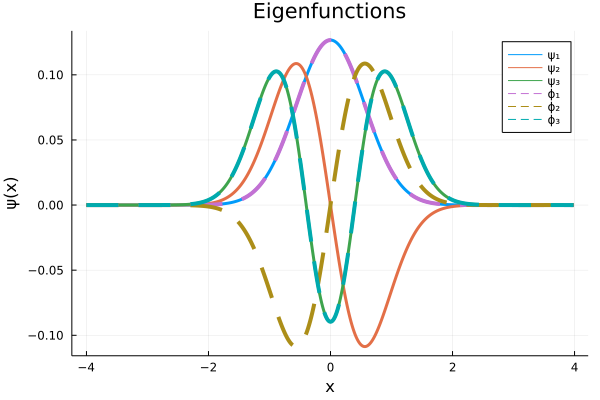

In [70]:
#= Plot the analytical and numercial wave functions 
    - x⃗ : position vector
    - ψ  : eigenfunctions
    - E  : eigenenergies
=#

plot(x⃗,ψ[:,1:3],label=["ψ₁" "ψ₂" "ψ₃"],title="Eigenfunctions",xlabel="x",ylabel="ψ(x)",lw=3,)
plot!(x⃗,ϕ(0,x⃗)/norm(ϕ(0,x⃗)),label="ϕ₁",lw=4,ls=:dash)
plot!(x⃗,ϕ(1,x⃗)/norm(ϕ(1,x⃗)),label="ϕ₂",lw=4,ls=:dash)
plot!(x⃗,ϕ(2,x⃗)/norm(ϕ(2,x⃗)),label="ϕ₃",lw=4,ls=:dash)



In [71]:
E

500-element Vector{Float64}:
   0.158105882603611
   0.4743016453814777
   0.7904654008699232
   1.1065971442071592
   1.4226968705283118
   1.7387645749664145
   2.0548002526520364
   2.370803898715057
   2.6867755083022455
   3.0027150767195905
   ⋮
 782.9812255966066
 783.7042015387382
 783.7488844346326
 784.6101717040603
 784.6590580530707
 785.713555470264
 785.7667822745825
 787.1616013075901
 787.219710994245